<a href="https://colab.research.google.com/github/yehocoh/The-Season-of-NASDAQ-and-S-P500/blob/main/ML_Final_Project_Model_for_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle
from sklearn.ensemble import RandomForestClassifier

# Loading Data_Set and TF Model

### Entering Path

In [ ]:
path="/Users/ohadbenmoshe/Library/Mobile Documents/com~apple~CloudDocs/Hebrew University/סימסטר א תשפג/למידת מכונה/עבודות/Final Project"

In [ ]:
model_file = os.path.join(path, 'Random_Forest.pickle')
data_file = os.path.join(path, 'Nasdaq_Jan_2023.csv')

### Reading Data into DF-'Nasdaq_Jan_2023'

In [ ]:
Nasdaq_Jan_2023  = pd.read_csv(data_file, index_col=False)
Nasdaq_Jan_2023.reset_index(inplace=True, drop=True)
Nasdaq_Jan_2023.head()

,Date,Close_Nasdaq,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX
0,2023-01-03,10386.980469,4780650000,101.199646,96.323723,22.90
1,2023-01-04,10458.759766,5085380000,102.586082,97.062141,22.01
2,2023-01-05,10305.240234,4764270000,103.014977,96.922440,22.46
3,2023-01-06,10569.290039,5199780000,104.910103,98.169769,21.13
4,2023-01-09,10635.650391,5132190000,105.468666,98.419235,21.97


### Preparation of X_Data

In [ ]:
X_Data=Nasdaq_Jan_2023[["Volume_Nasdaq","Close_Bonds_20more","Close_Bonds_7to10", "VIX"]].copy()
X_Data.head()

,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX
0,4780650000,101.199646,96.323723,22.90
1,5085380000,102.586082,97.062141,22.01
2,4764270000,103.014977,96.922440,22.46
3,5199780000,104.910103,98.169769,21.13
4,5132190000,105.468666,98.419235,21.97


### Preparation of y_Data and converting Nasdaq price to Log

In [ ]:

y_Data=Nasdaq_Jan_2023[["Close_Nasdaq"]].copy()
y_Data["Close_Nasdaq_Log"]=y_Data["Close_Nasdaq"].apply(lambda x: math.log10(x))
y_Data.head()

,Close_Nasdaq,Close_Nasdaq_Log
0,10386.980469,4.016489
1,10458.759766,4.019480
2,10305.240234,4.013058
3,10569.290039,4.024046
4,10635.650391,4.026764


## Loading Random Forest and Renning Prediction on Loaded Data Set

In [ ]:
# Loading saved RF Model
os.chdir(path)
with open(model_file, 'rb') as f:
    rf_loaded = pickle.load(f)

### Executing Prediction

In [ ]:
Prediction = rf_loaded.predict(X_Data)

In [ ]:
Prediction = pd.DataFrame(Prediction, columns = ['Prediction_Nasdaq_Log'])
Prediction["Prediction_Nasdaq_Value"]=Prediction.apply(lambda x :(10 ** x.Prediction_Nasdaq_Log), axis=1)
Prediction.head()

,Prediction_Nasdaq_Log,Prediction_Nasdaq_Value
0,3.706191,5083.824688
1,3.703567,5053.207206
2,3.708234,5107.803694
3,3.740478,5501.464153
4,3.708640,5112.582343


## Evaluating the Model's Prediction

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE= mean_absolute_error(Prediction.Prediction_Nasdaq_Value, y_Data.Close_Nasdaq)
Root_MSE=mean_squared_error(Prediction.Prediction_Nasdaq_Value, y_Data.Close_Nasdaq)**0.5
R2=r2_score(Prediction.Prediction_Nasdaq_Value, y_Data.Close_Nasdaq)
score = rf_loaded.score(X_Data,y_Data.Close_Nasdaq_Log)
print("\033[1m"+f"Mean Absolute Error:     \033[0m {MAE_Train: ,.2f}", "\033[1m"+f"Percent of MAE from Mean: \033[0m {MAE/y_Data.Close_Nasdaq.mean()*100: .2f}","%")
print("\033[1m"+f"Root Mean Squared Error: \033[0m {Root_MSE_Train: ,.2f}", "\033[1m"+f"Percent of RMSE from Mean: \033[0m {Root_MSE/y_Data.Close_Nasdaq.mean()*100: .2f}","%")
print("\033[1m"+f"R Squared:                        \033[0m {R2: ,.2f}")
print("\033[1m"+f"Random Forest Score for Test:     \033[0m {score: ,.4f}")

Mean Absolute Error:       6,016.23 Percent of MAE from Mean:   52.92 %
Root Mean Squared Error:   6,035.79 Percent of RMSE from Mean:   53.09 %
R Squared:                         -2,259.18
Random Forest Score for Test:      -242.0629


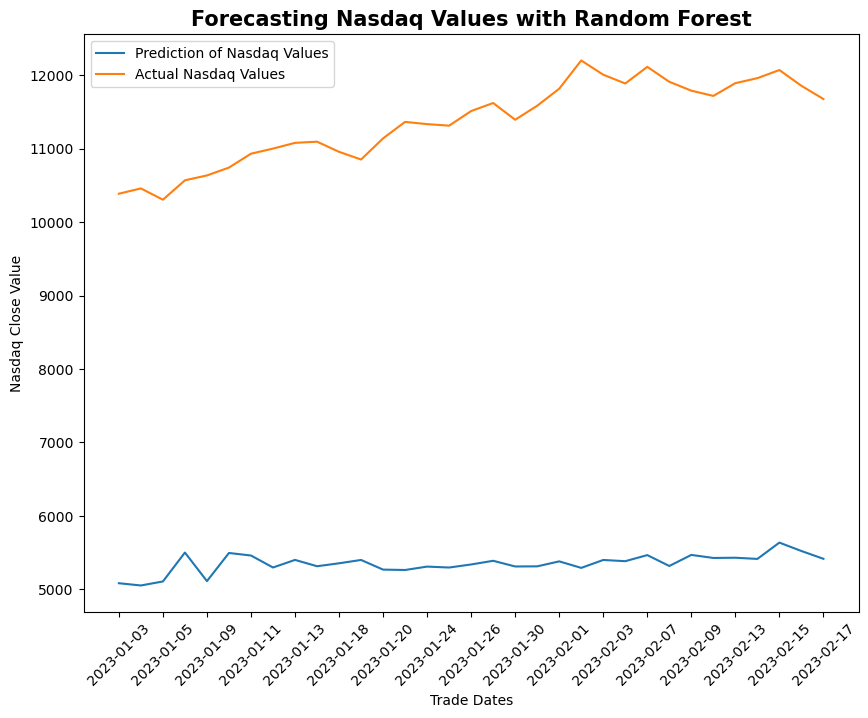

In [ ]:
plt.figure(figsize=(10,7.5))
plt.plot(Nasdaq_Jan_2023.Date, Prediction.Prediction_Nasdaq_Value, label='Prediction of Nasdaq Values')
plt.plot(Nasdaq_Jan_2023.Date, y_Data.Close_Nasdaq, label='Actual Nasdaq Values')

plt.xticks(Nasdaq_Jan_2023.Date[::2], rotation=45)
plt.title("Forecasting Nasdaq Values with Random Forest", fontsize= 15, fontweight='bold')
plt.xlabel('Trade Dates');
plt.ylabel('Nasdaq Close Value')
plt.legend()